In [1]:
import pandas as pd 
import numpy as np 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns 

pd.options.display.max_columns = None
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_booking.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [3]:
df["reservation_status"].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [4]:
pd.crosstab(df["reservation_status"], df["is_canceled"])

is_canceled,0,1
reservation_status,,
Canceled,0,43017
Check-Out,75166,0
No-Show,0,1207


In [5]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [6]:
for i in df["hotel"]:
    if i in ["Resort Hotel"]:
        print(i)

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel
Resort Hotel

In [7]:
df_ref=df.copy()

In [8]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [9]:
#Updating the dtypes

In [10]:
df['arrival_date_year'] = df['arrival_date_year'].astype('object')

df['arrival_date_month'] = df['arrival_date_month'].astype('object')

df['arrival_date_week_number'] = df['arrival_date_week_number'].astype('object')

df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('object')

df['agent'] = df['agent'].astype('object')

df['company'] = df['company'].astype('object')

In [11]:
#Null values

In [12]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [14]:
#Replace nul values with mode for children

In [15]:
df['children'].fillna(0,inplace=True)

In [16]:
#Dropping the country as no use in model building There are 177 unique countries in the dataset and 488 missing values.
#Dropping the agent id as no use in model building
#Dropping the company as more null values

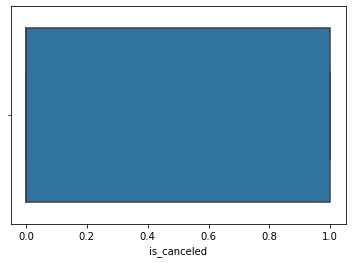

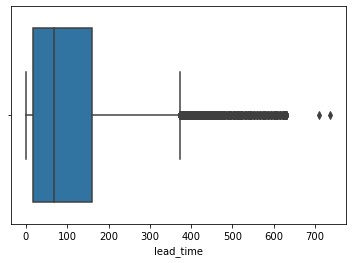

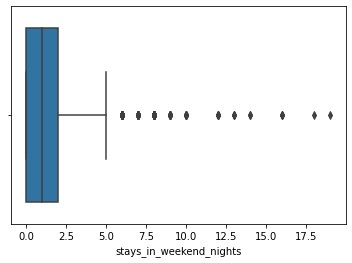

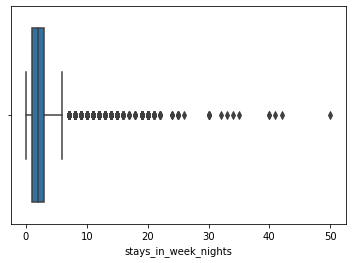

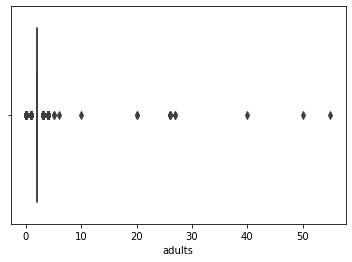

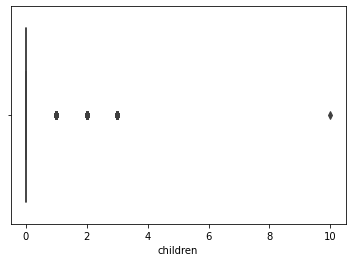

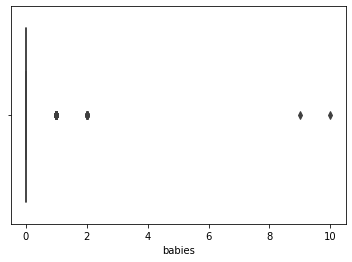

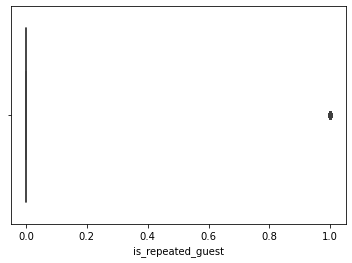

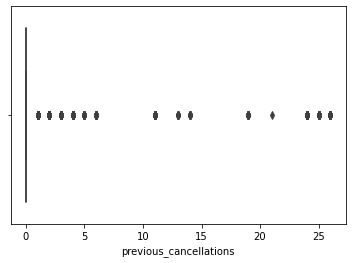

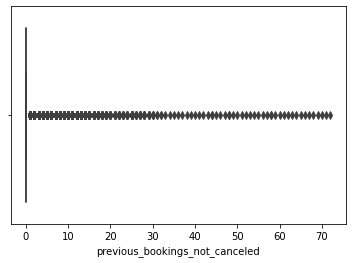

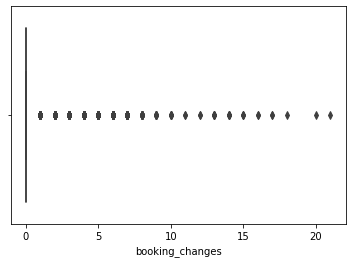

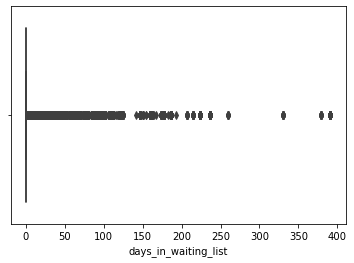

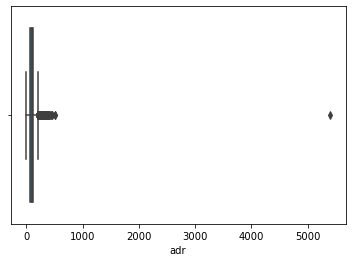

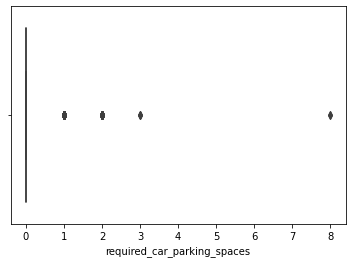

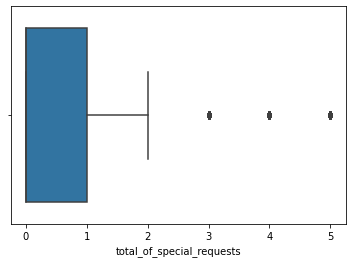

In [17]:
for i in df.select_dtypes(include = ['number']):
    sns.boxplot(df[i])
    plt.show()

In [18]:
#Working data

In [19]:
working_data = df.copy()

In [20]:
working_data.shape

(119390, 36)

In [21]:
#Outlires remove for adr

<AxesSubplot:xlabel='adr'>

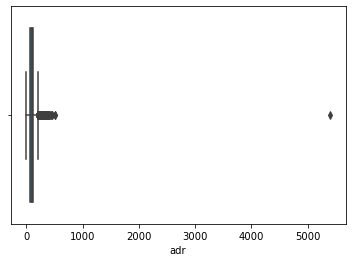

In [22]:
sns.boxplot(df['adr'])

In [23]:
#adr values can't be < 0

In [24]:
working_data = working_data[working_data['adr'] > 0]

In [25]:
working_data['adr'].quantile(0.75)

126.0

In [26]:
working_data['adr'].quantile(0.95)

194.0

In [27]:
working_data['adr'].quantile(0.96)

202.7651999999999

In [28]:
working_data['adr'].quantile(0.97)

215.0

In [29]:
working_data['adr'].quantile(0.98)

230.0

In [30]:
working_data['adr'].quantile(0.99)

252.0

In [31]:
working_data['adr'].quantile(1)

5400.0

In [32]:
#Removing with the data > 252 as the range is high between quantile at 0.99 and 1

In [33]:
working_data = working_data[working_data['adr'] <= 252]

In [34]:
working_data.shape

(116262, 36)

<AxesSubplot:xlabel='adr'>

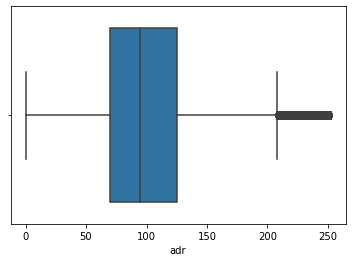

In [35]:
sns.boxplot(working_data['adr'])

In [36]:
outliers_columns = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adr']

In [37]:
#Outliers treatment for lead_time

<AxesSubplot:xlabel='lead_time'>

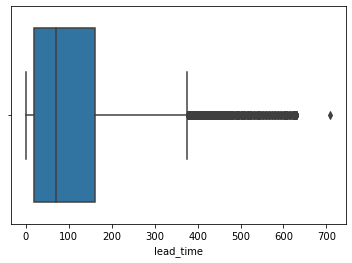

In [38]:
sns.boxplot(working_data['lead_time'])

In [39]:
working_data['lead_time'].quantile(0.80)

186.0

In [40]:
working_data['lead_time'].quantile(0.85)

219.0

In [41]:
working_data['lead_time'].quantile(0.90)

266.0

In [42]:
working_data['lead_time'].quantile(0.95)

320.0

In [43]:
working_data['lead_time'].quantile(0.98)

393.0

In [44]:
working_data['lead_time'].quantile(0.99)

445.0

In [45]:
#From the boxplot and the quantile point considering the observations less than  and equal to 445

In [46]:
working_data[working_data['lead_time'] > 445].shape

(1162, 36)

In [162]:
working_data = working_data[working_data['lead_time'] <= 445]

<AxesSubplot:xlabel='lead_time'>

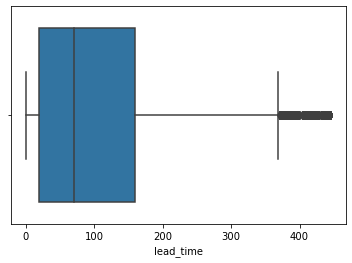

In [48]:
sns.boxplot(working_data['lead_time'])

In [49]:
#Outliers treatment for stays_in_weekend_nights

<AxesSubplot:xlabel='stays_in_weekend_nights'>

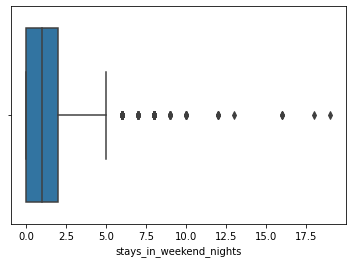

In [50]:
sns.boxplot(working_data['stays_in_weekend_nights'])

In [51]:
working_data['stays_in_weekend_nights'].quantile(0.75)

2.0

In [52]:
working_data['stays_in_weekend_nights'].quantile(0.80)

2.0

In [53]:
working_data['stays_in_weekend_nights'].quantile(0.9)

2.0

In [54]:
working_data['stays_in_weekend_nights'].quantile(0.95)

2.0

In [55]:
working_data['stays_in_weekend_nights'].quantile(0.97)

2.0

In [56]:
working_data['stays_in_weekend_nights'].quantile(0.99)

4.0

In [57]:
working_data['stays_in_weekend_nights'].quantile(1)

19.0

In [58]:
working_data[working_data['stays_in_weekend_nights'] > 4].shape

(331, 36)

In [59]:
#From the boxplot and the quantile point considering the observations less than  and equal to 4

In [60]:
working_data = working_data[working_data['stays_in_weekend_nights'] <= 4]

In [61]:
working_data.shape

(114769, 36)

<AxesSubplot:xlabel='stays_in_weekend_nights'>

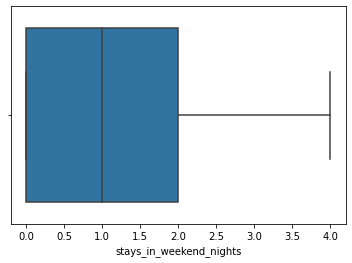

In [62]:
sns.boxplot(working_data['stays_in_weekend_nights'])

In [63]:
#Outliers treatment for stays_in_week_nights

<AxesSubplot:xlabel='stays_in_week_nights'>

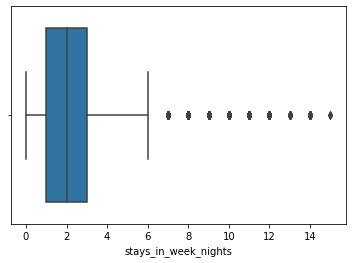

In [64]:
sns.boxplot(working_data['stays_in_week_nights'])

In [65]:
working_data[working_data['stays_in_week_nights'] > 6].shape

(2941, 36)

In [66]:
#From the boxplot and the quantile point considering the observations less than  and equal to 6

In [67]:
working_data = working_data[working_data['stays_in_week_nights'] <= 6]

In [68]:
working_data.shape

(111828, 36)

In [69]:
df_num = working_data.select_dtypes(include = np.number)

In [70]:
df_num.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [71]:
#Outliers treatment for days_in_waiting_list

<AxesSubplot:xlabel='days_in_waiting_list'>

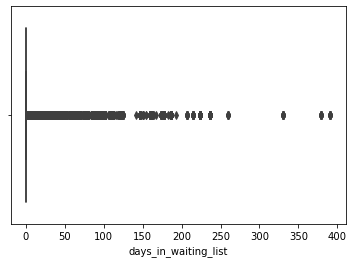

In [72]:
sns.boxplot(working_data['days_in_waiting_list'])

In [73]:
working_data['days_in_waiting_list'].quantile(0.95)

0.0

In [74]:
working_data['days_in_waiting_list'].quantile(0.97)

17.0

In [75]:
working_data['days_in_waiting_list'].quantile(0.98)

44.0

In [76]:
working_data['days_in_waiting_list'].quantile(0.99)

77.0

In [77]:
#From the boxplot and the quantile point considering the observations less than  and equal to 77

In [78]:
working_data[working_data['days_in_waiting_list'] > 77].shape

(1062, 36)

In [79]:
working_data = working_data[working_data['days_in_waiting_list'] <= 77]

In [80]:
working_data.shape

(110766, 36)

In [81]:
#Distribution after outlier treatment

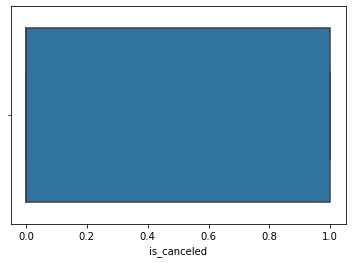

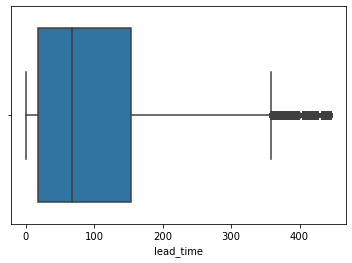

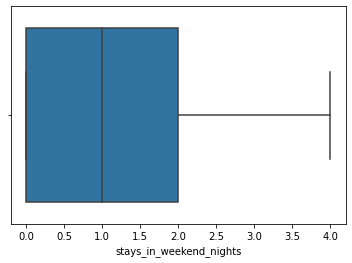

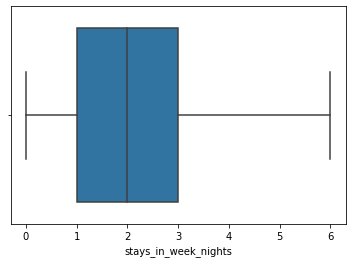

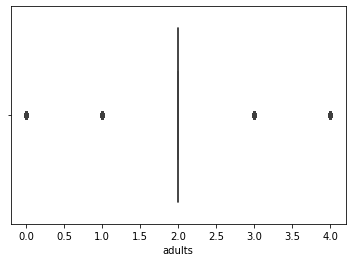

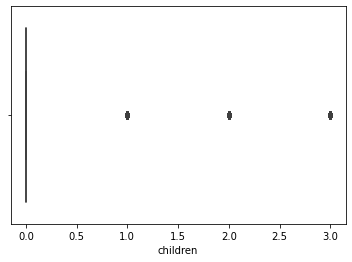

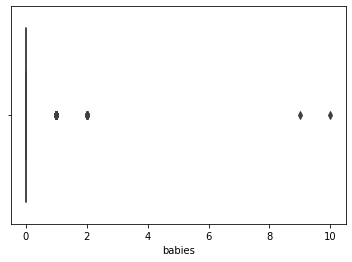

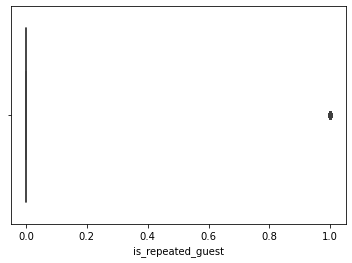

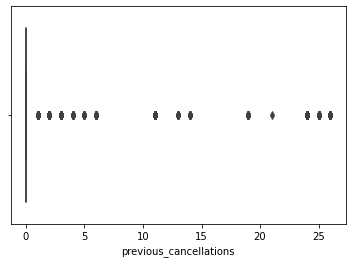

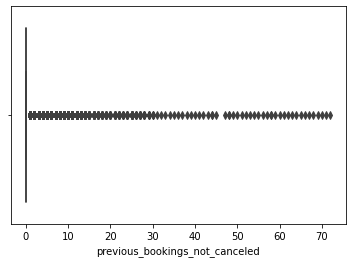

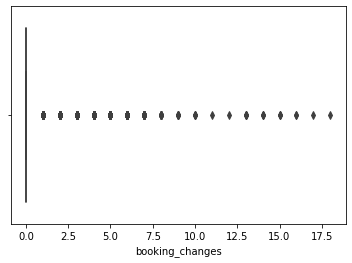

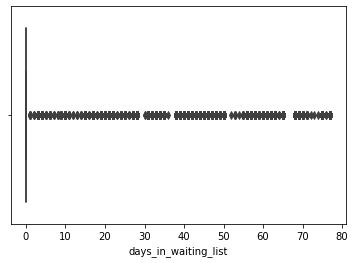

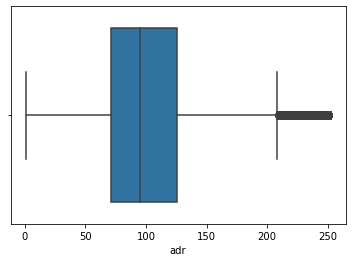

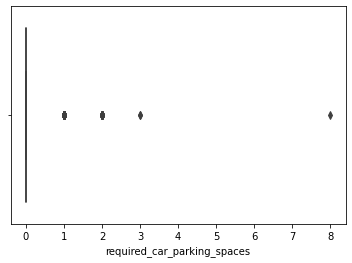

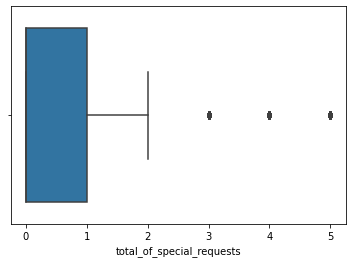

In [82]:
for i in working_data.select_dtypes(include = ['number']):
    sns.boxplot(working_data[i])
    plt.show()

In [83]:
# We can't remove outliers in 'children', 'previous_cancellations', 'previous_bookings_not_canceled',
#'booking_changes','required_car_parking_spaces', 'total_of_special_requests'

#This data's are small range of values we can't remove outliers from them

In [84]:
working_data.shape

(110766, 36)

### Feature Engineering:

In [85]:
df2=working_data.copy()

The booking months have been clubbed based on the seasons – Winter, Summer, 
Spring, and Autumn

In [86]:
df2["seasons"]=df2["arrival_date_month"].map({"March":'Spring',
                                            "April":'Spring',
                                            "May":'Spring',
                                            "June":'summer',
                                            "July":'summer',
                                            "August":'summer',
                                            "September":'Autumn',
                                            "October":'Autumn',
                                            "November":'Autumn',
                                            "December":'Winter',
                                            "January":'Winter',
                                            "February":'Winter'})

In [87]:
#Droping the personal information columns
#Droping arrival_date_month,arrival_date_week_number,arrival_date_day_of_month since considering seasonal
#Droping the date columns

In [88]:
df2 = df2.drop(['name','email','phone-number','credit_card'], axis=1)
df2 = df2.drop(['agent','company'], axis=1)
df2 = df2.drop(['arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month'], axis=1)
df2 = df2.drop('reservation_status_date', axis=1)

In [89]:
df2 = df2.drop(['country','arrival_date_year'],axis=1)

In [90]:
#adding a new column desired room based on reseved and assigned room type
df2['Desired_Room'] = np.where(df2['reserved_room_type'] == df2['assigned_room_type'], 1, 0)

In [91]:
df2 = df2.drop(['reserved_room_type','assigned_room_type'], axis=1)

In [92]:
#Updating the total_bookings column as per previous_cancellations, previous_bookings_not_canceled
#Updating is_repeated_guest column as per previous_bookings_not_canceled

In [93]:
df2['total_bookings'] = df2['previous_cancellations']+ df2['previous_bookings_not_canceled']

df2['is_repeated_guest'] = np.where(df2['previous_bookings_not_canceled'] > 1, 1, 0)

In [94]:
df2 = df2.drop(['previous_cancellations','previous_bookings_not_canceled'], axis=1)

In [95]:
df2.shape

(110766, 23)

In [96]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'seasons',
       'Desired_Room', 'total_bookings'],
      dtype='object')

In [97]:
df2['distribution_channel'].value_counts()

TA/TO        91177
Direct       13042
Corporate     6355
GDS            187
Undefined        5
Name: distribution_channel, dtype: int64

In [98]:
#Replacing the Undefined in distribution_channel with mode

In [99]:
df2['distribution_channel'] = np.where(df2['distribution_channel']== "Undefined", "TA/TO", df2['distribution_channel'])

In [100]:
df2['distribution_channel'].value_counts()

TA/TO        91182
Direct       13042
Corporate     6355
GDS            187
Name: distribution_channel, dtype: int64

In [101]:
df2['meal'].value_counts()

BB           86172
HB           12527
SC           10324
Undefined     1018
FB             725
Name: meal, dtype: int64

In [102]:
#Replacing the Undefined in meal with SC (no meal package)

In [103]:
df2['meal'] = np.where(df2['meal']== "Undefined", "SC", df2['meal'])

In [104]:
df2['meal'].value_counts()

BB    86172
HB    12527
SC    11342
FB      725
Name: meal, dtype: int64

In [105]:
df2['market_segment'].value_counts()

Online TA        53959
Offline TA/TO    21775
Groups           17974
Direct           11658
Corporate         5127
Aviation           208
Complementary       63
Undefined            2
Name: market_segment, dtype: int64

In [106]:
#Replacing the Undefined in market_segment with mode

In [107]:
df2['market_segment'] = np.where(df2['market_segment']== "Undefined", "Online TA", df2['market_segment'])

In [108]:
df2['market_segment'].value_counts()

Online TA        53961
Offline TA/TO    21775
Groups           17974
Direct           11658
Corporate         5127
Aviation           208
Complementary       63
Name: market_segment, dtype: int64

In [109]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'seasons',
       'Desired_Room', 'total_bookings'],
      dtype='object')

In [110]:
df2.shape

(110766, 23)

In [111]:
#There are 110766 observations and 23 columns in the dataset after EDA and Feature engineering

In [112]:
df2.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,seasons,Desired_Room,total_bookings
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,Direct,Direct,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out,summer,0,0
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out,summer,1,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,No Deposit,0,Transient,98.0,0,1,Check-Out,summer,1,0
5,Resort Hotel,0,14,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,No Deposit,0,Transient,98.0,0,1,Check-Out,summer,1,0
6,Resort Hotel,0,0,0,2,2,0.0,0,BB,Direct,Direct,0,0,No Deposit,0,Transient,107.0,0,0,Check-Out,summer,1,0


### Statistics

In [113]:
df_stat=df2.copy()

In [114]:
df_stat.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                       float64
babies                           int64
meal                            object
market_segment                  object
distribution_channel            object
is_repeated_guest                int32
booking_changes                  int64
deposit_type                    object
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status              object
seasons                         object
Desired_Room                     int32
total_bookings                   int64
dtype: object

In [115]:
df_stat.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'seasons',
       'Desired_Room', 'total_bookings'],
      dtype='object')

In [116]:
df_stat.shape

(110766, 23)

In [117]:
df_num=df_stat[['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests',
        'total_bookings']]

In [118]:
df_cat=df_stat[['hotel', 'is_canceled', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
      'deposit_type', 'reservation_status',
       'customer_type','seasons',
       'Desired_Room']]

In [119]:
df_num.shape

(110766, 12)

In [120]:
df_num.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_bookings
2,7,0,1,1,0.0,0,0,0,75.0,0,0,0
3,13,0,1,1,0.0,0,0,0,75.0,0,0,0
4,14,0,2,2,0.0,0,0,0,98.0,0,1,0
5,14,0,2,2,0.0,0,0,0,98.0,0,1,0
6,0,0,2,2,0.0,0,0,0,107.0,0,0,0


In [121]:
df_cat.shape

(110766, 11)

In [122]:
df_cat.head()

,hotel,is_canceled,meal,market_segment,distribution_channel,is_repeated_guest,deposit_type,reservation_status,customer_type,seasons,Desired_Room
2,Resort Hotel,0,BB,Direct,Direct,0,No Deposit,Check-Out,Transient,summer,0
3,Resort Hotel,0,BB,Corporate,Corporate,0,No Deposit,Check-Out,Transient,summer,1
4,Resort Hotel,0,BB,Online TA,TA/TO,0,No Deposit,Check-Out,Transient,summer,1
5,Resort Hotel,0,BB,Online TA,TA/TO,0,No Deposit,Check-Out,Transient,summer,1
6,Resort Hotel,0,BB,Direct,Direct,0,No Deposit,Check-Out,Transient,summer,1


In [123]:
X=df_cat.drop("is_canceled", axis=1)
X.head()

,hotel,meal,market_segment,distribution_channel,is_repeated_guest,deposit_type,reservation_status,customer_type,seasons,Desired_Room
2,Resort Hotel,BB,Direct,Direct,0,No Deposit,Check-Out,Transient,summer,0
3,Resort Hotel,BB,Corporate,Corporate,0,No Deposit,Check-Out,Transient,summer,1
4,Resort Hotel,BB,Online TA,TA/TO,0,No Deposit,Check-Out,Transient,summer,1
5,Resort Hotel,BB,Online TA,TA/TO,0,No Deposit,Check-Out,Transient,summer,1
6,Resort Hotel,BB,Direct,Direct,0,No Deposit,Check-Out,Transient,summer,1


In [124]:
#Performing the chi2_contingency test for Categorical variables to check the significant var

### chi2_contingency Test for Independence

𝐻0 : The variables are independent / insignificant

𝐻1: The variables are not independent (i.e. variables are dependent) / significant

In [125]:
from scipy.stats import chi2_contingency

for var in X:
    table = pd.crosstab(df_stat["is_canceled"], df_stat[var],normalize='columns')
    observed_value = table.values
    test_stat, p_value, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    print("{}: {}: ".format(var,p_value))

hotel: 0.8410780049562139: 
meal: 0.9709331988419929: 
market_segment: 0.9874136826345024: 
distribution_channel: 0.9786743806894651: 
is_repeated_guest: 0.5843552011431903: 
deposit_type: 0.4743041131572474: 
reservation_status: 0.22313016014842982: 
customer_type: 0.9545366447770954: 
seasons: 0.9996530134361622: 
Desired_Room: 0.545462920071403: 


We observe that the p_values of all the columns are greater than 0.05. Hence, we fail to reject the null hypothesis. Therefore, we conclude that all the categorical features are not significant as per chi2_contingency test

In [126]:
#Checking the normality of numeric variables
#To check weather parametric or non-parametric need to be perform

In [127]:
df_1=df_stat[df_stat['is_canceled'] == 1]
df_0=df_stat[df_stat['is_canceled'] == 0]

In [128]:
df_1_1=df_1[['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests',
        'total_bookings']]
df_0_0=df_0[['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests',
        'total_bookings']]

### Shapiro-Wilk normality test

H0: The data is normally distributed

H1: The data is not normally distributed

In [129]:
#For complete dataset
from scipy import stats
for var in df_num:
    stat, p_value = stats.shapiro(df_num[var])
    print("{}: {}: ".format(var,p_value))

lead_time: 0.0: 
stays_in_weekend_nights: 0.0: 
stays_in_week_nights: 0.0: 
adults: 0.0: 
children: 0.0: 
babies: 0.0: 
booking_changes: 0.0: 
days_in_waiting_list: 0.0: 
adr: 0.0: 
required_car_parking_spaces: 0.0: 
total_of_special_requests: 0.0: 
total_bookings: 0.0: 


In [130]:
#For observations with class 1
from scipy import stats
for var in df_1_1:
    stat, p_value = stats.shapiro(df_1_1[var])
    print("{}: {}: ".format(var,p_value))

lead_time: 0.0: 
stays_in_weekend_nights: 0.0: 
stays_in_week_nights: 0.0: 
adults: 0.0: 
children: 0.0: 
babies: 0.0: 
booking_changes: 0.0: 
days_in_waiting_list: 0.0: 
adr: 0.0: 
required_car_parking_spaces: 1.0: 
total_of_special_requests: 0.0: 
total_bookings: 0.0: 


In [131]:
#For observations with class 0
from scipy import stats
for var in df_0_0:
    stat, p_value = stats.shapiro(df_0_0[var])
    print("{}: {}: ".format(var,p_value))

lead_time: 0.0: 
stays_in_weekend_nights: 0.0: 
stays_in_week_nights: 0.0: 
adults: 0.0: 
children: 0.0: 
babies: 0.0: 
booking_changes: 0.0: 
days_in_waiting_list: 0.0: 
adr: 0.0: 
required_car_parking_spaces: 0.0: 
total_of_special_requests: 0.0: 
total_bookings: 0.0: 


In [132]:
#From the above we can see that all are not noramlly distributed
#So going with non parametric Kruskal-Wallis H Test

### Kruskal-Wallis H Test

p <= alpha: reject H0, different distribution.


p > alpha: fail to reject H0, same distribution.

In [133]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal
seed(1)

for var in df_num:
    stat, p_value = stats.kruskal(df_1[var], df_0[var])
    print("{}: {}: ".format(var,p_value))

lead_time: 0.0: 
stays_in_weekend_nights: 0.21862300571052584: 
stays_in_week_nights: 1.2122537981409106e-41: 
adults: 1.779920786053128e-99: 
children: 0.012617414767348836: 
babies: 3.495043440580182e-31: 
booking_changes: 0.0: 
days_in_waiting_list: 1.676763863710668e-256: 
adr: 5.585747682758942e-54: 
required_car_parking_spaces: 0.0: 
total_of_special_requests: 0.0: 
total_bookings: 0.0: 


We observe that the p_values of all the columns are less than 0.05 expect stays_in_weekend_nights. Hence, we reject the null hypothesis. Therefore, we conclude that all the numerical features are significant as per Kruskal-Wallis H Test expect stays_in_weekend_nights

In [134]:
#sns.pairplot(df_stat, hue="is_canceled")

In [135]:
#From the above we can see that the model is not linearly seperable

### Model building

In [136]:
df_stat.head(2)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,seasons,Desired_Room,total_bookings
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,Direct,Direct,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out,summer,0,0
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out,summer,1,0


In [137]:
df_stat.shape

(110766, 23)

In [138]:
#Encoding for categorical variables

In [139]:
df_c=df_stat.select_dtypes(include="object")
df_c.head(2)

,hotel,meal,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,seasons
2,Resort Hotel,BB,Direct,Direct,No Deposit,Transient,Check-Out,summer
3,Resort Hotel,BB,Corporate,Corporate,No Deposit,Transient,Check-Out,summer


In [179]:
encode=pd.get_dummies(df_stat, drop_first=True)
encode.shape

(110766, 38)

In [141]:
#Creating new dataframe

In [180]:
df_new=encode.copy()
df_new.head(2)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Desired_Room,total_bookings,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,seasons_Spring,seasons_Winter,seasons_summer
2,0,7,0,1,1,0.0,0,0,0,0,75.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
3,0,13,0,1,1,0.0,0,0,0,0,75.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


In [181]:
df_new.shape

(110766, 38)

In [182]:
X_m=df_new.drop("is_canceled", axis=1)
y_m=df_new["is_canceled"]

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size=0.3, random_state=10, stratify=y_m)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (77536, 37)
X_test (33230, 37)
y_train (77536,)
y_test (33230,)


In [184]:
from scipy import stats
f_test, p_val = stats.f_oneway(y_train, y_test, y_m)
p_val

0.9999832784889563

In [143]:
#From the above p_value we can say the mean distribution same in all groups

In [172]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score,classification_report, f1_score

### Logistic mdoel

In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
lr_base=LogisticRegression()
lr_base.fit(X_train, y_train)

LogisticRegression()

In [187]:
y_pred_lr_base_train=lr_base.predict(X_train)
y_prob_lr_base_train=lr_base.predict_proba(X_train)

y_pred_lr_base_test=lr_base.predict(X_test)
y_prob_lr_base_test=lr_base.predict_proba(X_test)

In [188]:
accuracy_score_lr_base_train=accuracy_score(y_train, y_pred_lr_base_train)
print("accuracy_score_lr_base_train", accuracy_score_lr_base_train)
accuracy_score_lr_base_test=accuracy_score(y_test, y_pred_lr_base_test)
print("accuracy_score_lr_base_test", accuracy_score_lr_base_test)

accuracy_score_lr_base_train 0.9999226165910029
accuracy_score_lr_base_test 0.999939813421607


In [189]:
df_feature_importances= pd.DataFrame({'Variable': X_train.columns, 'feature_importances': abs(lr_base.coef_[0])})
sorted_feature_importances = df_feature_importances.sort_values('feature_importances', ascending = False)

In [190]:
sorted_feature_importances

,Variable,feature_importances
32,reservation_status_Check-Out,16.696483
27,deposit_type_Non Refund,3.243509
12,Desired_Room,2.404466
30,customer_type_Transient,1.697091
10,required_car_parking_spaces,1.391160
21,market_segment_Groups,1.315496
3,adults,1.268060
26,distribution_channel_TA/TO,1.172908
31,customer_type_Transient-Party,1.156510
35,seasons_Winter,0.833800


In [191]:
pd.crosstab(df_stat["is_canceled"],df_stat["reservation_status"])

reservation_status,Canceled,Check-Out,No-Show
is_canceled,,,
0,0,69741,0
1,39934,0,1091


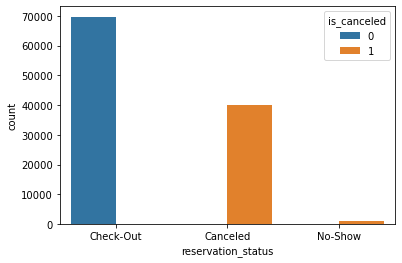

In [192]:
sns.countplot(df_stat["reservation_status"], hue=df_stat["is_canceled"])
plt.show()

In [193]:
#From th above beta_coef we can see that reservation_status_check_out dominating the model with huge coef value
#And also from the countplot of reservation_status we can see that there is no use in using the variable for prediction

In [194]:
#Droping the reservation test from train and test

In [195]:
X_train.drop(["reservation_status_Check-Out", "reservation_status_No-Show"], axis=1, inplace=True)

In [196]:
X_train.shape

(77536, 35)

In [197]:
X_test.drop(["reservation_status_Check-Out", "reservation_status_No-Show"], axis=1, inplace=True)

In [198]:
X_test.shape

(33230, 35)

### Plot the confusion matrix.

In [199]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

### Plot the ROC curve.

In [200]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    plt.grid(True)

##### Decision Tree for Classification with_out Gridsearch

In [201]:
from sklearn.tree import DecisionTreeClassifier

dtc_base = DecisionTreeClassifier(criterion = 'gini', random_state = 10)
dtc_base.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [202]:
y_pred_dtc_base_train=dtc_base.predict(X_train)
y_prob_dtc_base_train=dtc_base.predict_proba(X_train)

y_pred_dtc_base_test=dtc_base.predict(X_test)
y_prob_dtc_base_test=dtc_base.predict_proba(X_test)

In [203]:
accuracy_score_dtc_base_train=accuracy_score(y_train, y_pred_dtc_base_train)
print("accuracy_score_dtc_base_train", accuracy_score_dtc_base_train)
accuracy_score_dtc_base_test=accuracy_score(y_test, y_pred_dtc_base_test)
print("accuracy_score_dtc_base_test", accuracy_score_dtc_base_test)

accuracy_score_dtc_base_train 0.9911395996698308
accuracy_score_dtc_base_test 0.815016551309058


In [204]:
classification_report_dtc_base_train=classification_report(y_train, y_pred_dtc_base_train)
print("classification_report_dtc_base_train\n", classification_report_dtc_base_train)
classification_report_dtc_base_test=classification_report(y_test, y_pred_dtc_base_test)
print("classification_report_dtc_base_test\n", classification_report_dtc_base_test)

classification_report_dtc_base_train
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     48819
           1       0.99      0.98      0.99     28717

    accuracy                           0.99     77536
   macro avg       0.99      0.99      0.99     77536
weighted avg       0.99      0.99      0.99     77536

classification_report_dtc_base_test
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     20922
           1       0.75      0.75      0.75     12308

    accuracy                           0.82     33230
   macro avg       0.80      0.80      0.80     33230
weighted avg       0.82      0.82      0.82     33230



In [205]:
f1_score_dtc_base_train=recall_score(y_train, y_pred_dtc_base_train)
print("f1_score_dtc_base_train",f1_score_dtc_base_train)
f1_score_dtc_base_test=recall_score(y_test, y_pred_dtc_base_test)
print("f1_score_dtc_base_test",f1_score_dtc_base_test)

f1_score_dtc_base_train 0.9820663718354982
f1_score_dtc_base_test 0.7546311342216444


In [206]:
Diff_dtc_base_test=accuracy_score_dtc_base_train-accuracy_score_dtc_base_test
print("Diff_dtc_base_test",Diff_dtc_base_test)

Diff_dtc_base_test 0.17612304836077275


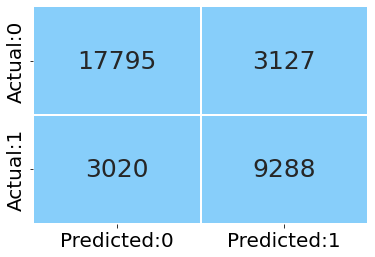

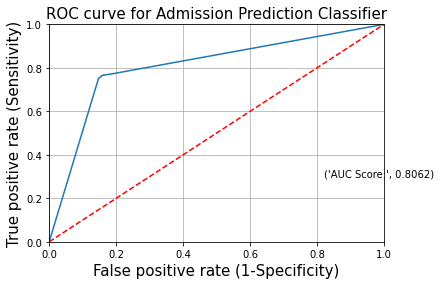

In [207]:
plot_confusion_matrix(dtc_base)
plot_roc(dtc_base)

In [208]:
score_card = pd.DataFrame(columns=['Model_Name','Accuracy_Score_train', "Accuracy_Score_test", 'f1_score_train',"f1_score_test", "Diff_accuracy"])

In [210]:
Model = pd.Series({'Model_Name': "DTC_Base",
                    'Accuracy_Score_train': accuracy_score_dtc_base_train*100,
                    'Accuracy_Score_test': accuracy_score_dtc_base_test*100,
                     'f1_score_train': f1_score_dtc_base_train*100,
                     'f1_score_test': f1_score_dtc_base_test*100,
                    "Diff_accuracy":Diff_dtc_base_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,DTC_Base,99.11396,81.501655,98.206637,75.463113,17.612305
1,DTC_Base,99.11396,81.501655,98.206637,75.463113,17.612305


### Decision Tree for Classification with Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,5),
                     'min_samples_leaf': range(1,5),
                     'max_leaf_nodes': range(1, 5)}]
 

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 3)

dtc_grid = tree_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', dtc_grid.best_params_, '\n')

In [211]:
dtc_grid = DecisionTreeClassifier(criterion= 'entropy', max_depth= 2, max_features= 'sqrt', max_leaf_nodes= 3, 
                                       min_samples_leaf= 1, min_samples_split= 2, random_state = 10)
dtc_grid.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                       max_leaf_nodes=3, random_state=10)

In [212]:
y_pred_dtc_grid_train=dtc_grid.predict(X_train)
y_prob_dtc_grid_train=dtc_grid.predict_proba(X_train)

y_pred_dtc_grid_test=dtc_grid.predict(X_test)
y_prob_dtc_grid_test=dtc_grid.predict_proba(X_test)

In [213]:
accuracy_score_dtc_grid_train=accuracy_score(y_train, y_pred_dtc_grid_train)
print("accuracy_score_dtc_grid_train", accuracy_score_dtc_grid_train)
accuracy_score_dtc_grid_test=accuracy_score(y_test, y_pred_dtc_grid_test)
print("accuracy_score_dtc_grid_test", accuracy_score_dtc_grid_test)

accuracy_score_dtc_grid_train 0.6800582955014445
accuracy_score_dtc_grid_test 0.678784231116461


In [214]:
classification_report_dtc_grid_train=classification_report(y_train, y_pred_dtc_grid_train)
print("classification_report_dtc_grid_train\n", classification_report_dtc_grid_train)
classification_report_dtc_grid_test=classification_report(y_test, y_pred_dtc_grid_test)
print("classification_report_dtc_grid_test\n", classification_report_dtc_grid_test)

classification_report_dtc_grid_train
               precision    recall  f1-score   support

           0       0.68      0.92      0.78     48819
           1       0.67      0.27      0.38     28717

    accuracy                           0.68     77536
   macro avg       0.68      0.60      0.58     77536
weighted avg       0.68      0.68      0.64     77536

classification_report_dtc_grid_test
               precision    recall  f1-score   support

           0       0.68      0.92      0.78     20922
           1       0.67      0.26      0.38     12308

    accuracy                           0.68     33230
   macro avg       0.67      0.59      0.58     33230
weighted avg       0.68      0.68      0.63     33230



In [215]:
f1_score_dtc_grid_train=recall_score(y_train, y_pred_dtc_grid_train)
print("f1_score_dtc_grid_train",f1_score_dtc_grid_train)
f1_score_dtc_grid_test=recall_score(y_test, y_pred_dtc_grid_test)
print("f1_score_dtc_grid_test",f1_score_dtc_grid_test)

f1_score_dtc_grid_train 0.26736776125639866
f1_score_dtc_grid_test 0.2642996425089373


In [216]:
Diff_dtc_grid_test=accuracy_score_dtc_grid_train-accuracy_score_dtc_grid_test
print("Diff_dtc_grid_test",abs(Diff_dtc_grid_test))

Diff_dtc_grid_test 0.0012740643849834532


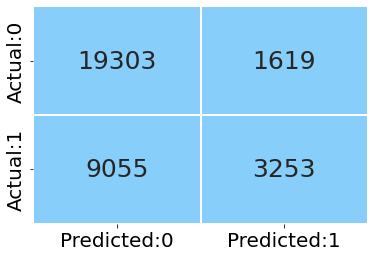

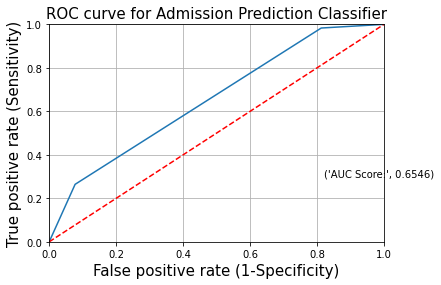

In [217]:
plot_confusion_matrix(dtc_grid)
plot_roc(dtc_grid)

In [218]:
Model = pd.Series({'Model_Name': "Dtc_grid",
                    'Accuracy_Score_train': accuracy_score_dtc_grid_train*100,
                    'Accuracy_Score_test': accuracy_score_dtc_grid_test*100,
                     'f1_score_train': f1_score_dtc_grid_train*100,
                     'f1_score_test': f1_score_dtc_grid_test*100,
                    "Diff_accuracy":Diff_dtc_grid_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,DTC_Base,99.11396,81.501655,98.206637,75.463113,17.612305
1,DTC_Base,99.11396,81.501655,98.206637,75.463113,17.612305
2,Dtc_grid,68.00583,67.878423,26.736776,26.429964,0.127406


#### Naive Bayes Algorithm

In [219]:
from sklearn.naive_bayes import BernoulliNB

In [220]:
Navie_bayes = BernoulliNB()

Navie_bayes.fit(X_train, y_train)

BernoulliNB()

In [221]:
y_pred_Navie_bayes_train=Navie_bayes.predict(X_train)
y_prob_Navie_bayes_train=Navie_bayes.predict_proba(X_train)

y_pred_Navie_bayes_test=Navie_bayes.predict(X_test)
y_prob_Navie_bayes_test=Navie_bayes.predict_proba(X_test)

In [222]:
accuracy_score_Navie_bayes_train=accuracy_score(y_train, y_pred_Navie_bayes_train)
print("accuracy_score_Navie_bayes_train", accuracy_score_Navie_bayes_train)
accuracy_score_Navie_bayes_test=accuracy_score(y_test, y_pred_Navie_bayes_test)
print("accuracy_score_Navie_bayes_test", accuracy_score_Navie_bayes_test)

accuracy_score_Navie_bayes_train 0.7798184069335534
accuracy_score_Navie_bayes_test 0.780439362022269


In [223]:
classification_report_Navie_bayes_train=classification_report(y_train, y_pred_Navie_bayes_train)
print("classification_report_Navie_bayes_train\n", classification_report_Navie_bayes_train)
classification_report_Navie_bayes_test=classification_report(y_test, y_pred_Navie_bayes_test)
print("classification_report_Navie_bayes_test\n", classification_report_Navie_bayes_test)

classification_report_Navie_bayes_train
               precision    recall  f1-score   support

           0       0.80      0.88      0.83     48819
           1       0.75      0.62      0.67     28717

    accuracy                           0.78     77536
   macro avg       0.77      0.75      0.75     77536
weighted avg       0.78      0.78      0.77     77536

classification_report_Navie_bayes_test
               precision    recall  f1-score   support

           0       0.80      0.87      0.83     20922
           1       0.74      0.62      0.68     12308

    accuracy                           0.78     33230
   macro avg       0.77      0.75      0.76     33230
weighted avg       0.78      0.78      0.78     33230



In [224]:
f1_score_Navie_bayes_train=recall_score(y_train, y_pred_Navie_bayes_train)
print("f1_score_Navie_bayes_train",f1_score_Navie_bayes_train)
f1_score_Navie_bayes_test=recall_score(y_test, y_pred_Navie_bayes_test)
print("f1_score_Navie_bayes_test",f1_score_Navie_bayes_test)

f1_score_Navie_bayes_train 0.616533760490302
f1_score_Navie_bayes_test 0.6199220019499513


In [225]:
Diff_Navie_bayes_test=accuracy_score_Navie_bayes_train-accuracy_score_Navie_bayes_test
print("Diff_Navie_bayes_test",abs(Diff_Navie_bayes_test))

Diff_Navie_bayes_test 0.0006209550887156245


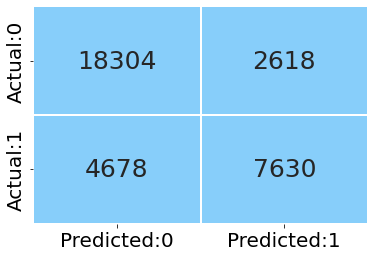

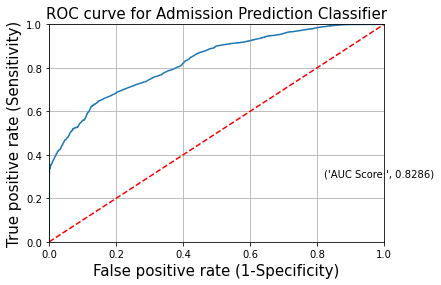

In [226]:
plot_confusion_matrix(Navie_bayes)
plot_roc(Navie_bayes)

In [227]:
Model = pd.Series({'Model_Name': "Navie_bayes",
                    'Accuracy_Score_train': accuracy_score_Navie_bayes_train*100,
                    'Accuracy_Score_test': accuracy_score_Navie_bayes_test*100,
                     'f1_score_train': f1_score_Navie_bayes_train*100,
                     'f1_score_test': f1_score_Navie_bayes_test*100,
                    "Diff_accuracy":Diff_Navie_bayes_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
1,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
2,Dtc_grid,68.005830,67.878423,26.736776,26.429964,0.127406
3,Navie_bayes,77.981841,78.043936,61.653376,61.992200,-0.062096


### Naive Bayes Algorithm with Gridsearch

params = {'alpha': [0, 0.01, 0.1, 0.5, 1.0]}
Navie_bayes = BernoulliNB()

Navie_grid = GridSearchCV(estimator = Navie_bayes, 
                         param_grid = params, 
                         cv = 3)

NB_grid = Navie_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', NB_grid.best_params_, '\n')

In [228]:
Navie_bayes_grid = BernoulliNB(alpha= 1.0)

Navie_bayes_grid.fit(X_train, y_train)

BernoulliNB()

In [229]:
y_pred_Navie_bayes_grid_train=Navie_bayes_grid.predict(X_train)
y_prob_Navie_bayes_grid_train=Navie_bayes_grid.predict_proba(X_train)

y_pred_Navie_bayes_grid_test=Navie_bayes_grid.predict(X_test)
y_prob_Navie_bayes_grid_test=Navie_bayes_grid.predict_proba(X_test)

In [230]:
accuracy_score_Navie_bayes_grid_train=accuracy_score(y_train, y_pred_Navie_bayes_grid_train)
print("accuracy_score_Navie_bayes_grid_train", accuracy_score_Navie_bayes_grid_train)
accuracy_score_Navie_bayes_grid_test=accuracy_score(y_test, y_pred_Navie_bayes_grid_test)
print("accuracy_score_Navie_bayes_grid_test", accuracy_score_Navie_bayes_grid_test)

accuracy_score_Navie_bayes_grid_train 0.7798184069335534
accuracy_score_Navie_bayes_grid_test 0.780439362022269


In [231]:
classification_report_Navie_bayes_grid_train=classification_report(y_train, y_pred_Navie_bayes_grid_train)
print("classification_report_Navie_bayes_grid_train\n", classification_report_Navie_bayes_grid_train)
classification_report_Navie_bayes_grid_test=classification_report(y_test, y_pred_Navie_bayes_grid_test)
print("classification_report_Navie_bayes_grid_test\n", classification_report_Navie_bayes_grid_test)

classification_report_Navie_bayes_grid_train
               precision    recall  f1-score   support

           0       0.80      0.88      0.83     48819
           1       0.75      0.62      0.67     28717

    accuracy                           0.78     77536
   macro avg       0.77      0.75      0.75     77536
weighted avg       0.78      0.78      0.77     77536

classification_report_Navie_bayes_grid_test
               precision    recall  f1-score   support

           0       0.80      0.87      0.83     20922
           1       0.74      0.62      0.68     12308

    accuracy                           0.78     33230
   macro avg       0.77      0.75      0.76     33230
weighted avg       0.78      0.78      0.78     33230



In [232]:
f1_score_Navie_bayes_grid_train=recall_score(y_train, y_pred_Navie_bayes_grid_train)
print("f1_score_Navie_bayes_grid_train",f1_score_Navie_bayes_grid_train)
f1_score_Navie_bayes_grid_test=recall_score(y_test, y_pred_Navie_bayes_grid_test)
print("f1_score_Navie_bayes_grid_test",f1_score_Navie_bayes_grid_test)

f1_score_Navie_bayes_grid_train 0.616533760490302
f1_score_Navie_bayes_grid_test 0.6199220019499513


In [233]:
Diff_Navie_bayes_grid_test=accuracy_score_Navie_bayes_grid_train-accuracy_score_Navie_bayes_grid_test
print("Diff_Navie_bayes_grid_test",abs(Diff_Navie_bayes_grid_test))

Diff_Navie_bayes_grid_test 0.0006209550887156245


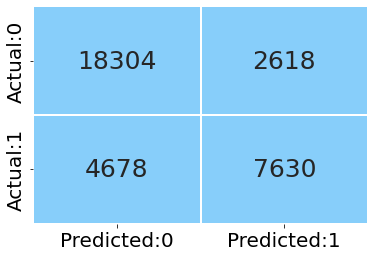

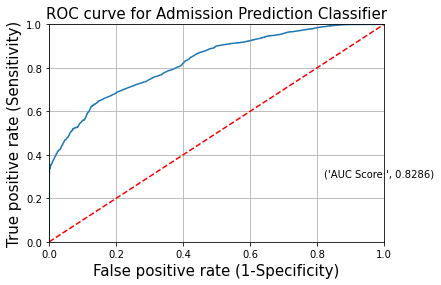

In [234]:
plot_confusion_matrix(Navie_bayes_grid)
plot_roc(Navie_bayes_grid)

In [235]:
Model = pd.Series({'Model_Name': "Navie_bayes_grid",
                    'Accuracy_Score_train': accuracy_score_Navie_bayes_grid_train*100,
                    'Accuracy_Score_test': accuracy_score_Navie_bayes_grid_test*100,
                     'f1_score_train': f1_score_Navie_bayes_grid_train*100,
                     'f1_score_test': f1_score_Navie_bayes_grid_test*100,
                    "Diff_accuracy":Diff_Navie_bayes_grid_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
1,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
2,Dtc_grid,68.005830,67.878423,26.736776,26.429964,0.127406
3,Navie_bayes,77.981841,78.043936,61.653376,61.992200,-0.062096
4,Navie_bayes_grid,77.981841,78.043936,61.653376,61.992200,-0.062096


### AdaBoost_Base

In [236]:
from sklearn.ensemble import AdaBoostClassifier

In [237]:
ada_model = AdaBoostClassifier(n_estimators = 12, random_state = 10)

ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=12, random_state=10)

In [238]:
y_pred_ada_model_train=ada_model.predict(X_train)
y_prob_ada_model_train=ada_model.predict_proba(X_train)

y_pred_ada_model_test=ada_model.predict(X_test)
y_prob_ada_model_test=ada_model.predict_proba(X_test)

In [239]:
accuracy_score_ada_model_train=accuracy_score(y_train, y_pred_ada_model_train)
print("accuracy_score_ada_model_train", accuracy_score_ada_model_train)
accuracy_score_ada_model_test=accuracy_score(y_test, y_pred_ada_model_test)
print("accuracy_score_ada_model_test", accuracy_score_ada_model_test)

accuracy_score_ada_model_train 0.8105009286009079
accuracy_score_ada_model_test 0.81017153174842


In [240]:
classification_report_ada_model_train=classification_report(y_train, y_pred_ada_model_train)
print("classification_report_ada_model_train\n", classification_report_ada_model_train)
classification_report_ada_model_test=classification_report(y_test, y_pred_ada_model_test)
print("classification_report_ada_model_test\n", classification_report_ada_model_test)

classification_report_ada_model_train
               precision    recall  f1-score   support

           0       0.80      0.94      0.86     48819
           1       0.85      0.60      0.70     28717

    accuracy                           0.81     77536
   macro avg       0.82      0.77      0.78     77536
weighted avg       0.82      0.81      0.80     77536

classification_report_ada_model_test
               precision    recall  f1-score   support

           0       0.80      0.93      0.86     20922
           1       0.84      0.60      0.70     12308

    accuracy                           0.81     33230
   macro avg       0.82      0.77      0.78     33230
weighted avg       0.81      0.81      0.80     33230



In [241]:
f1_score_ada_model_train=recall_score(y_train, y_pred_ada_model_train)
print("f1_score_ada_model_train",f1_score_ada_model_train)
f1_score_ada_model_test=recall_score(y_test, y_pred_ada_model_test)
print("f1_score_ada_model_test",f1_score_ada_model_test)

f1_score_ada_model_train 0.597694745272835
f1_score_ada_model_test 0.6000974975625609


In [242]:
Diff_ada_model_test=accuracy_score_ada_model_train-accuracy_score_ada_model_test
print("Diff_ada_model_test",abs(Diff_ada_model_test))

Diff_ada_model_test 0.0003293968524878954


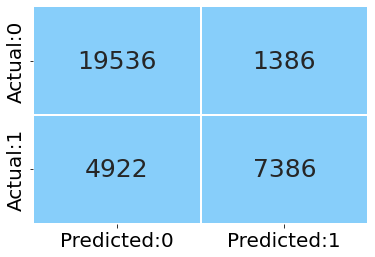

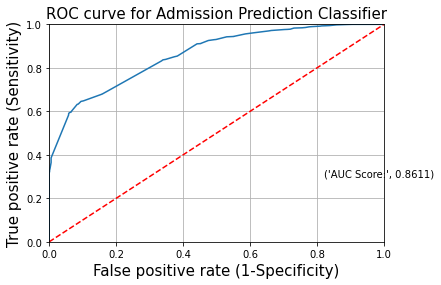

In [243]:
plot_confusion_matrix(ada_model)
plot_roc(ada_model)

In [244]:
Model = pd.Series({'Model_Name': "Ada_model",
                    'Accuracy_Score_train': accuracy_score_ada_model_train*100,
                    'Accuracy_Score_test': accuracy_score_ada_model_test*100,
                     'f1_score_train': f1_score_ada_model_train*100,
                     'f1_score_test': f1_score_ada_model_test*100,
                    "Diff_accuracy":Diff_ada_model_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
1,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
2,Dtc_grid,68.005830,67.878423,26.736776,26.429964,0.127406
3,Navie_bayes,77.981841,78.043936,61.653376,61.992200,-0.062096
4,Navie_bayes_grid,77.981841,78.043936,61.653376,61.992200,-0.062096
5,Ada_model,81.050093,81.017153,59.769475,60.009750,0.032940


### AdaBoost_Grid

tuning_parameters = {'learning_rate': [0, 0.0001,0.001,0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9],
                     'n_estimators': range(2,50)}

dtc_grid = DecisionTreeClassifier(criterion= 'entropy', max_depth= 2, max_features= 'log2', max_leaf_nodes= 4, 
                                       min_samples_leaf= 1, min_samples_split= 2, random_state = 10)

ada_model = AdaBoostClassifier( base_estimator=dtc_grid, random_state = 10)

ada_grid = GridSearchCV(estimator = ada_model, param_grid = tuning_parameters, cv = 5, scoring = 'roc_auc')

ada_grid.fit(X_train, y_train)

print('Best parameters for XGBoost classifier: ', ada_grid.best_params_, '\n')

In [245]:
ada_grid = AdaBoostClassifier(n_estimators = 19,  learning_rate=0.6, random_state = 10)

ada_grid.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.6, n_estimators=19, random_state=10)

In [246]:
y_pred_ada_grid_train=ada_grid.predict(X_train)
y_prob_ada_grid_train=ada_grid.predict_proba(X_train)

y_pred_ada_grid_test=ada_grid.predict(X_test)
y_prob_ada_grid_test=ada_grid.predict_proba(X_test)

In [247]:
accuracy_score_ada_grid_train=accuracy_score(y_train, y_pred_ada_grid_train)
print("accuracy_score_ada_grid_train", accuracy_score_ada_grid_train)
accuracy_score_ada_grid_test=accuracy_score(y_test, y_pred_ada_grid_test)
print("accuracy_score_ada_grid_train", accuracy_score_ada_grid_test)

accuracy_score_ada_grid_train 0.8107330788278992
accuracy_score_ada_grid_train 0.8103821847727957


In [248]:
classification_report_ada_grid_train=classification_report(y_train, y_pred_ada_grid_train)
print("classification_report_ada_grid_train\n", classification_report_ada_grid_train)
classification_report_ada_grid_test=classification_report(y_test, y_pred_ada_grid_test)
print("classification_report_ada_grid_test\n", classification_report_ada_grid_test)

classification_report_ada_grid_train
               precision    recall  f1-score   support

           0       0.79      0.94      0.86     48819
           1       0.86      0.58      0.70     28717

    accuracy                           0.81     77536
   macro avg       0.83      0.76      0.78     77536
weighted avg       0.82      0.81      0.80     77536

classification_report_ada_grid_test
               precision    recall  f1-score   support

           0       0.79      0.94      0.86     20922
           1       0.86      0.59      0.70     12308

    accuracy                           0.81     33230
   macro avg       0.83      0.76      0.78     33230
weighted avg       0.82      0.81      0.80     33230



In [249]:
f1_score_ada_grid_train=recall_score(y_train, y_pred_ada_grid_train)
print("f1_score_ada_grid_train",f1_score_ada_grid_train)
f1_score_ada_grid_test=recall_score(y_test, y_pred_ada_grid_test)
print("f1_score_ada_grid_test",f1_score_ada_grid_test)

f1_score_ada_grid_train 0.5835567782149946
f1_score_ada_grid_test 0.5858791030224244


In [250]:
Diff_ada_grid_test=accuracy_score_ada_grid_train-accuracy_score_ada_grid_test
print("Diff_ada_grid_test",abs(Diff_ada_grid_test))

Diff_ada_grid_test 0.00035089405510357885


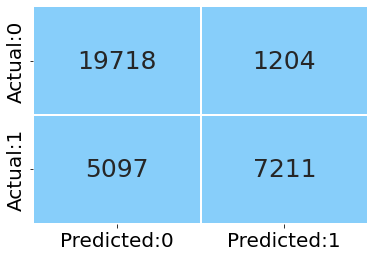

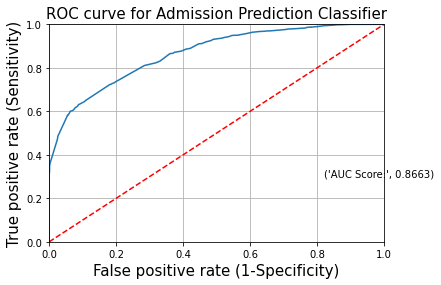

In [251]:
plot_confusion_matrix(ada_grid)
plot_roc(ada_grid)

In [252]:
Model = pd.Series({'Model_Name': "Ada_grid",
                    'Accuracy_Score_train': accuracy_score_ada_grid_train*100,
                    'Accuracy_Score_test': accuracy_score_ada_grid_test*100,
                     'f1_score_train': f1_score_ada_grid_train*100,
                     'f1_score_test': f1_score_ada_grid_test*100,
                    "Diff_accuracy":Diff_ada_grid_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
1,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
2,Dtc_grid,68.005830,67.878423,26.736776,26.429964,0.127406
3,Navie_bayes,77.981841,78.043936,61.653376,61.992200,-0.062096
4,Navie_bayes_grid,77.981841,78.043936,61.653376,61.992200,-0.062096
5,Ada_model,81.050093,81.017153,59.769475,60.009750,0.032940
6,Ada_grid,81.073308,81.038218,58.355678,58.587910,0.035089


#### xgboost

In [253]:
import xgboost
from xgboost import XGBClassifier

In [254]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [255]:
y_pred_xgb_model_train=xgb_model.predict(X_train)
y_prob_xgb_model_train=xgb_model.predict_proba(X_train)

y_pred_xgb_model_test=xgb_model.predict(X_test)
y_prob_xgb_model_test=xgb_model.predict_proba(X_test)

In [256]:
accuracy_score_xgb_model_train=accuracy_score(y_train, y_pred_xgb_model_train)
print("accuracy_score_xgb_model_train", accuracy_score_xgb_model_train)
accuracy_score_xgb_model_test=accuracy_score(y_test, y_pred_xgb_model_test)
print("accuracy_score_xgb_model_test", accuracy_score_xgb_model_test)

accuracy_score_xgb_model_train 0.9001754023937267
accuracy_score_xgb_model_test 0.8480288895576287


In [257]:
classification_report_xgb_model_train=classification_report(y_train, y_pred_xgb_model_train)
print("classification_report_xgb_model_train\n", classification_report_xgb_model_train)
classification_report_xgb_model_test=classification_report(y_test, y_pred_xgb_model_test)
print("classification_report_xgb_model_test\n", classification_report_xgb_model_test)

classification_report_xgb_model_train
               precision    recall  f1-score   support

           0       0.90      0.95      0.92     48819
           1       0.90      0.82      0.86     28717

    accuracy                           0.90     77536
   macro avg       0.90      0.88      0.89     77536
weighted avg       0.90      0.90      0.90     77536

classification_report_xgb_model_test
               precision    recall  f1-score   support

           0       0.85      0.91      0.88     20922
           1       0.84      0.73      0.78     12308

    accuracy                           0.85     33230
   macro avg       0.84      0.82      0.83     33230
weighted avg       0.85      0.85      0.85     33230



In [258]:
f1_score_xgb_model_train=recall_score(y_train, y_pred_xgb_model_train)
print("f1_score_xgb_model_train",f1_score_xgb_model_train)
f1_score_xgb_model_test=recall_score(y_test, y_pred_xgb_model_test)
print("f1_score_xgb_model_test",f1_score_xgb_model_test)

f1_score_xgb_model_train 0.8179127346171258
f1_score_xgb_model_test 0.7346441338966526


In [259]:
Diff_xgb_model_test=accuracy_score_xgb_model_train-accuracy_score_xgb_model_test
print("Diff_xgb_model_test",abs(Diff_xgb_model_test))

Diff_xgb_model_test 0.05214651283609806


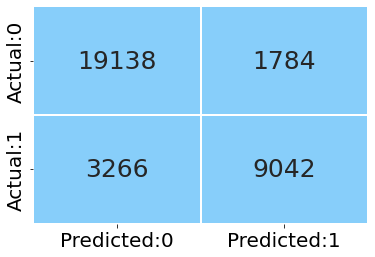

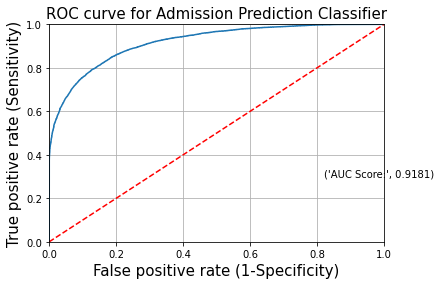

In [260]:
plot_confusion_matrix(xgb_model)
plot_roc(xgb_model)

In [261]:
Model = pd.Series({'Model_Name': "xgb_model",
                    'Accuracy_Score_train': accuracy_score_xgb_model_train*100,
                    'Accuracy_Score_test': accuracy_score_xgb_model_test*100,
                     'f1_score_train': f1_score_xgb_model_train*100,
                     'f1_score_test': f1_score_xgb_model_test*100,
                    "Diff_accuracy":Diff_xgb_model_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
1,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
2,Dtc_grid,68.005830,67.878423,26.736776,26.429964,0.127406
3,Navie_bayes,77.981841,78.043936,61.653376,61.992200,-0.062096
4,Navie_bayes_grid,77.981841,78.043936,61.653376,61.992200,-0.062096
5,Ada_model,81.050093,81.017153,59.769475,60.009750,0.032940
6,Ada_grid,81.073308,81.038218,58.355678,58.587910,0.035089
7,xgb_model,90.017540,84.802889,81.791273,73.464413,5.214651


### xgboost_Grid

tuning_parameters = {'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1],
                     'max_depth': range(1,10),
                     'n_estimators': range(2,10)}

xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

xgb_grid.fit(X_train, y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

In [262]:
xgb_grid = XGBClassifier(max_depth = 9, n_estimators = 9, learning_rate= 0.8)

xgb_grid.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.8, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=9, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [263]:
y_pred_xgb_grid_train=xgb_grid.predict(X_train)
y_prob_xgb_grid_train=xgb_grid.predict_proba(X_train)

y_pred_xgb_grid_test=xgb_grid.predict(X_test)
y_prob_xgb_grid_test=xgb_grid.predict_proba(X_test)

In [264]:
accuracy_score_xgb_grid_train=accuracy_score(y_train, y_pred_xgb_grid_train)
print("accuracy_score_xgb_grid_train", accuracy_score_xgb_grid_train)
accuracy_score_xgb_grid_test=accuracy_score(y_test, y_pred_xgb_grid_test)
print("accuracy_score_xgb_grid_test", accuracy_score_xgb_grid_test)

accuracy_score_xgb_grid_train 0.8436339248865043
accuracy_score_xgb_grid_test 0.8308757147156184


In [265]:
classification_report_xgb_grid_train=classification_report(y_train, y_pred_xgb_grid_train)
print("classification_report_xgb_grid_train\n", classification_report_xgb_grid_train)
classification_report_xgb_grid_test=classification_report(y_test, y_pred_xgb_grid_test)
print("classification_report_xgb_grid_test\n", classification_report_xgb_grid_test)

classification_report_xgb_grid_train
               precision    recall  f1-score   support

           0       0.85      0.92      0.88     48819
           1       0.84      0.72      0.77     28717

    accuracy                           0.84     77536
   macro avg       0.84      0.82      0.83     77536
weighted avg       0.84      0.84      0.84     77536

classification_report_xgb_grid_test
               precision    recall  f1-score   support

           0       0.84      0.91      0.87     20922
           1       0.82      0.70      0.75     12308

    accuracy                           0.83     33230
   macro avg       0.83      0.80      0.81     33230
weighted avg       0.83      0.83      0.83     33230



In [266]:
f1_score_xgb_grid_train=recall_score(y_train, y_pred_xgb_grid_train)
print("f1_score_xgb_grid_train",f1_score_xgb_grid_train)
f1_score_xgb_grid_test=recall_score(y_test, y_pred_xgb_grid_test)
print("f1_score_xgb_grid_test",f1_score_xgb_grid_test)

f1_score_xgb_grid_train 0.7154298847372637
f1_score_xgb_grid_test 0.6956451088722782


In [267]:
Diff_xgb_grid_test=accuracy_score_xgb_grid_train-accuracy_score_xgb_grid_test
print("Diff_xgb_grid_test",abs(Diff_xgb_grid_test))

Diff_xgb_grid_test 0.012758210170885964


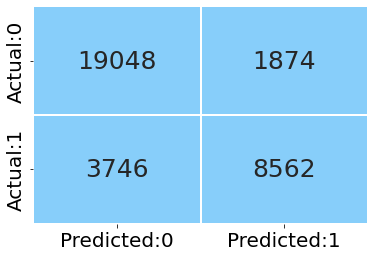

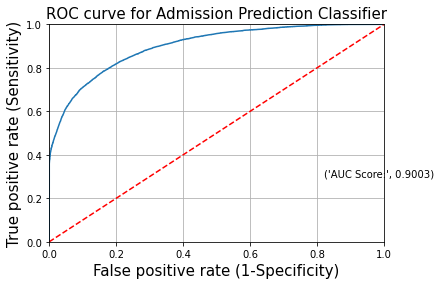

In [268]:
plot_confusion_matrix(xgb_grid)
plot_roc(xgb_grid)

In [269]:
Model = pd.Series({'Model_Name': "xgb_grid",
                    'Accuracy_Score_train': accuracy_score_xgb_grid_train*100,
                    'Accuracy_Score_test': accuracy_score_xgb_grid_test*100,
                     'f1_score_train': f1_score_xgb_grid_train*100,
                     'f1_score_test': f1_score_xgb_grid_test*100,
                    "Diff_accuracy":Diff_xgb_grid_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
1,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
2,Dtc_grid,68.005830,67.878423,26.736776,26.429964,0.127406
3,Navie_bayes,77.981841,78.043936,61.653376,61.992200,-0.062096
4,Navie_bayes_grid,77.981841,78.043936,61.653376,61.992200,-0.062096
5,Ada_model,81.050093,81.017153,59.769475,60.009750,0.032940
6,Ada_grid,81.073308,81.038218,58.355678,58.587910,0.035089
7,xgb_model,90.017540,84.802889,81.791273,73.464413,5.214651
8,xgb_grid,84.363392,83.087571,71.542988,69.564511,1.275821


### RandomForestClassifier

In [270]:
from sklearn.ensemble import RandomForestClassifier
rf_classification = RandomForestClassifier(n_estimators = 100, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

In [271]:
y_pred_rf_model_train=rf_model.predict(X_train)
y_prob_rf_model_train=rf_model.predict_proba(X_train)

y_pred_rf_model_test=rf_model.predict(X_test)
y_prob_rf_model_test=rf_model.predict_proba(X_test)

In [272]:
accuracy_score_rf_model_train=accuracy_score(y_train, y_pred_rf_model_train)
print("accuracy_score_rf_model_train", accuracy_score_rf_model_train)
accuracy_score_rf_model_test=accuracy_score(y_test, y_pred_rf_model_test)
print("accuracy_score_rf_model_test", accuracy_score_rf_model_test)

accuracy_score_rf_model_train 0.9911138052001651
accuracy_score_rf_model_test 0.8555522118567559


In [273]:
classification_report_rf_model_train=classification_report(y_train, y_pred_rf_model_train)
print("classification_report_rf_model_train\n", classification_report_rf_model_train)
classification_report_rf_model_test=classification_report(y_test, y_pred_rf_model_test)
print("classification_report_rf_model_test\n", classification_report_rf_model_test)

classification_report_rf_model_train
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     48819
           1       0.99      0.98      0.99     28717

    accuracy                           0.99     77536
   macro avg       0.99      0.99      0.99     77536
weighted avg       0.99      0.99      0.99     77536

classification_report_rf_model_test
               precision    recall  f1-score   support

           0       0.86      0.92      0.89     20922
           1       0.84      0.75      0.79     12308

    accuracy                           0.86     33230
   macro avg       0.85      0.83      0.84     33230
weighted avg       0.85      0.86      0.85     33230



In [274]:
f1_score_rf_model_train=recall_score(y_train, y_pred_rf_model_train)
print("f1_score_rf_model_train",f1_score_rf_model_train)
f1_score_rf_model_test=recall_score(y_test, y_pred_rf_model_test)
print("f1_score_rf_model_test",f1_score_rf_model_test)

f1_score_rf_model_train 0.9844691297837518
f1_score_rf_model_test 0.7516249593760156


In [275]:
Diff_rf_model_test=accuracy_score_rf_model_train-accuracy_score_rf_model_test
print("Diff_rf_model_test",abs(Diff_rf_model_test))

Diff_rf_model_test 0.13556159334340923


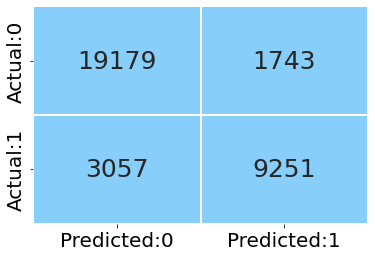

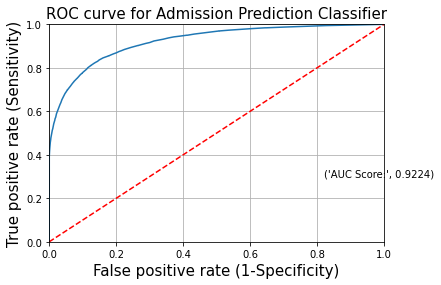

In [276]:
plot_confusion_matrix(rf_model)
plot_roc(rf_model)

In [277]:
Model = pd.Series({'Model_Name': "Rf_model",
                    'Accuracy_Score_train': accuracy_score_rf_model_train*100,
                    'Accuracy_Score_test': accuracy_score_rf_model_test*100,
                     'f1_score_train': f1_score_rf_model_train*100,
                     'f1_score_test': f1_score_rf_model_test*100,
                    "Diff_accuracy":Diff_rf_model_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
1,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
2,Dtc_grid,68.005830,67.878423,26.736776,26.429964,0.127406
3,Navie_bayes,77.981841,78.043936,61.653376,61.992200,-0.062096
4,Navie_bayes_grid,77.981841,78.043936,61.653376,61.992200,-0.062096
5,Ada_model,81.050093,81.017153,59.769475,60.009750,0.032940
6,Ada_grid,81.073308,81.038218,58.355678,58.587910,0.035089
7,xgb_model,90.017540,84.802889,81.791273,73.464413,5.214651
8,xgb_grid,84.363392,83.087571,71.542988,69.564511,1.275821
9,Rf_model,99.111381,85.555221,98.446913,75.162496,13.556159


### RandomForestClassifier With Gridsearch

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

In [278]:
from sklearn.ensemble import RandomForestClassifier
rf_grid = RandomForestClassifier(criterion= 'gini', max_depth= 10, max_features= 'sqrt', max_leaf_nodes= 11, 
                                 min_samples_leaf= 1, min_samples_split= 2, n_estimators= 50, random_state = 10)

rf_grid = rf_grid.fit(X_train, y_train)

In [279]:
y_pred_rf_grid_train=rf_grid.predict(X_train)
y_prob_rf_grid_train=rf_grid.predict_proba(X_train)

y_pred_rf_grid_test=rf_grid.predict(X_test)
y_prob_rf_grid_test=rf_grid.predict_proba(X_test)

In [280]:
accuracy_score_rf_grid_train=accuracy_score(y_train, y_pred_rf_grid_train)
print("accuracy_score_rf_grid_train", accuracy_score_rf_grid_train)
accuracy_score_rf_grid_test=accuracy_score(y_test, y_pred_rf_grid_test)
print("accuracy_score_rf_grid_test", accuracy_score_rf_grid_test)

accuracy_score_rf_grid_train 0.8011762278167561
accuracy_score_rf_grid_test 0.8003009328919651


In [281]:
classification_report_rf_grid_train=classification_report(y_train, y_pred_rf_grid_train)
print("classification_report_rf_grid_train\n", classification_report_rf_grid_train)
classification_report_rf_grid_test=classification_report(y_test, y_pred_rf_grid_test)
print("classification_report_rf_grid_test\n", classification_report_rf_grid_test)

classification_report_rf_grid_train
               precision    recall  f1-score   support

           0       0.78      0.96      0.86     48819
           1       0.89      0.53      0.66     28717

    accuracy                           0.80     77536
   macro avg       0.83      0.74      0.76     77536
weighted avg       0.82      0.80      0.79     77536

classification_report_rf_grid_test
               precision    recall  f1-score   support

           0       0.78      0.96      0.86     20922
           1       0.89      0.53      0.66     12308

    accuracy                           0.80     33230
   macro avg       0.83      0.74      0.76     33230
weighted avg       0.82      0.80      0.79     33230



In [282]:
f1_score_rf_grid_train=recall_score(y_train, y_pred_rf_grid_train)
print("f1_score_rf_grid_train",f1_score_rf_grid_train)
f1_score_rf_grid_test=recall_score(y_test, y_pred_rf_grid_test)
print("f1_score_rf_grid_test",f1_score_rf_grid_test)

f1_score_rf_grid_train 0.5280147647734791
f1_score_rf_grid_test 0.5268930776730582


In [283]:
Diff_rf_grid_test=accuracy_score_rf_grid_train-accuracy_score_rf_grid_test
print("Diff_rf_grid_test",abs(Diff_rf_grid_test))

Diff_rf_grid_test 0.0008752949247909925


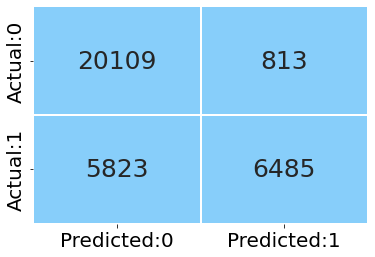

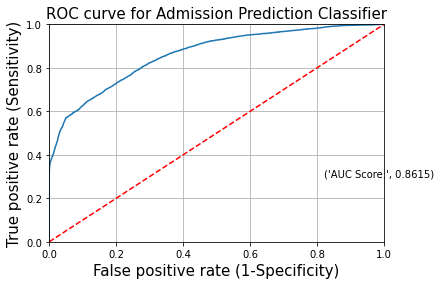

In [284]:
plot_confusion_matrix(rf_grid)
plot_roc(rf_grid)

In [285]:
Model = pd.Series({'Model_Name': "Rf_grid",
                    'Accuracy_Score_train': accuracy_score_rf_grid_train*100,
                    'Accuracy_Score_test': accuracy_score_rf_grid_test*100,
                     'f1_score_train': f1_score_rf_grid_train*100,
                     'f1_score_test': f1_score_rf_grid_test*100,
                    "Diff_accuracy":Diff_rf_grid_test*100
                     })

score_card = score_card.append(Model, ignore_index=True)

score_card

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,f1_score_train,f1_score_test,Diff_accuracy
0,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
1,DTC_Base,99.113960,81.501655,98.206637,75.463113,17.612305
2,Dtc_grid,68.005830,67.878423,26.736776,26.429964,0.127406
3,Navie_bayes,77.981841,78.043936,61.653376,61.992200,-0.062096
4,Navie_bayes_grid,77.981841,78.043936,61.653376,61.992200,-0.062096
5,Ada_model,81.050093,81.017153,59.769475,60.009750,0.032940
6,Ada_grid,81.073308,81.038218,58.355678,58.587910,0.035089
7,xgb_model,90.017540,84.802889,81.791273,73.464413,5.214651
8,xgb_grid,84.363392,83.087571,71.542988,69.564511,1.275821
9,Rf_model,99.111381,85.555221,98.446913,75.162496,13.556159


In [286]:
#From the aove we can see that XGBoost model with grid search giving good accuracy with good f1-score and less difference 
#in accuracy between train and test

In [287]:
feature_importances= pd.DataFrame({'Variable': X_train.columns, 'feature_importances': (xgb_grid.feature_importances_)*100})
sorted_feature_imp = feature_importances.sort_values('feature_importances', ascending = False)
sorted_feature_imp.head(6)

,Variable,feature_importances
27,deposit_type_Non Refund,69.563179
12,Desired_Room,7.674200
10,required_car_parking_spaces,3.996091
11,total_of_special_requests,2.460284
13,total_bookings,2.159756
23,market_segment_Online TA,2.115002


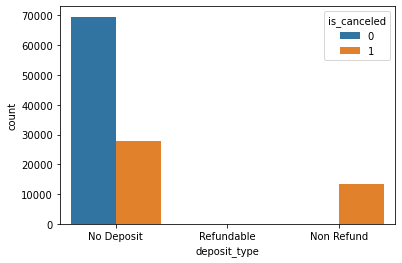

In [288]:
sns.countplot(df_stat["deposit_type"], hue=df_stat["is_canceled"])
plt.show()

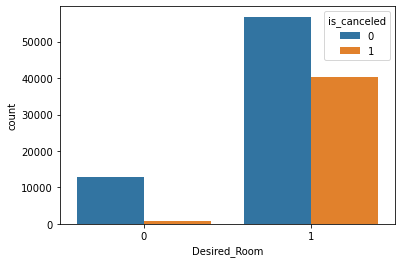

In [289]:
sns.countplot(df_stat["Desired_Room"], hue=df_stat["is_canceled"])
plt.show()

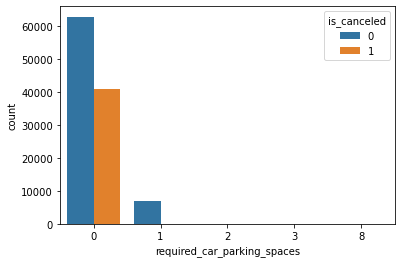

In [290]:
sns.countplot(df_stat["required_car_parking_spaces"], hue=df_stat["is_canceled"])
plt.show()

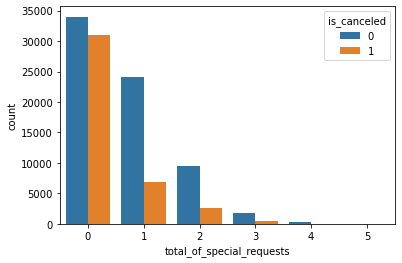

In [291]:
sns.countplot(df_stat["total_of_special_requests"], hue=df_stat["is_canceled"])
plt.show()

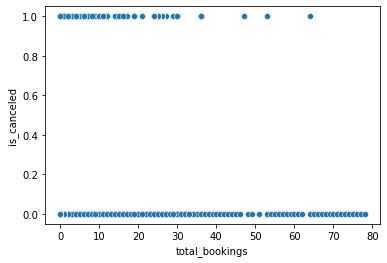

In [292]:
sns.scatterplot(df_stat["total_bookings"], df_stat["is_canceled"])
plt.show()

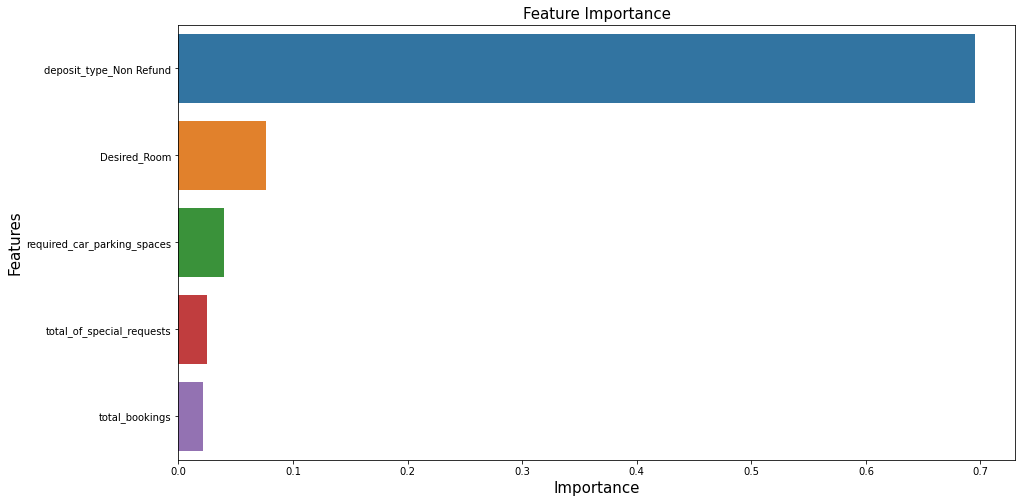

In [293]:
plt.rcParams["figure.figsize"]=[15,8]
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_grid.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features.head(5))

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [294]:
sorted_feature_imp.head(5)

,Variable,feature_importances
27,deposit_type_Non Refund,69.563179
12,Desired_Room,7.674200
10,required_car_parking_spaces,3.996091
11,total_of_special_requests,2.460284
13,total_bookings,2.159756


In [295]:
#From the feature importance we can see that deposit_type_Non Refund, Desired_Room, required_car_parking_spaces, 
  #total_of_special_requests,total_bookings, market_segment_Online TA are major factors for hotel booking cancellation
#deposit_type of Non Refund have major effect on hotel booking cancellation with almost 70%
#Desired_Room have second major effect on hotel booking cancellation which means if the assigned room and provided room is different then the cancellation chance is high
#If the car parking is not there then there is a chance of hotel booking cancellation
#If the special_requests are less means then there is a chance of hotel booking cancellation
#If the total booking by single coustomer is more then the there is less chance of hotel booking cancellation